In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, beta
import pymc3 as pm
import arviz as az

# Problem 1

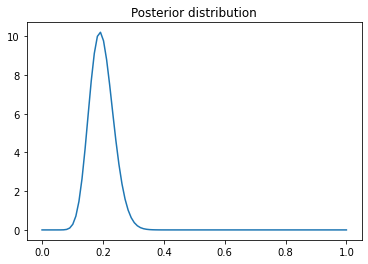

0.19191919191919193

In [44]:
def bernoulli_sampling(p, n):
    """
    Simulate n tosses of a coin which gives heads with probability 
    p. Then use that sample to calculate the posterior distribution on 
    p given a uniform prior.

    Parameters:
        p (float): probability of a successful bernoulli trial
        n (int): number of bernoulli trials to simulate

    Returns:
        (float): The MAP estimate of p
    """
    # Take sample
    sample = (np.random.random(n) < p) * 1

    # Compute integral
    theta = np.linspace(0, 1, n)
    x = sum(sample)
    f = lambda t: t**(np.sum(x)) * (1-t)**(n-np.sum(x))
    
    # Compute and plot posterior
    denominator = sum(f(theta)) * (theta[1] - theta[0])
    posterior = f(theta) / denominator
    plt.plot(theta, posterior)
    plt.title('Posterior distribution')
    plt.show()
    
    return theta[np.argmax(posterior)]

bernoulli_sampling(.2, 100)


# Problem 2

In [56]:
def non_uniform_prior(p, n, prior):
    """
    Generate a sample of size n that has a Bernoulli
    distribution with a probability parameter p.
    Use Bayes' theorem to compute the posterior distribution
    for the given prior and the generated sample:
    
        P(t|x) = P(x|t) P(t) / P(x)
    
    Plot both prior and posterior distributions between [0, 1]

    Parameters:
        p (float): probability of a successful bernoulli trial
        n (int): number of bernoulli trials to simulate
        prior (scipy dist): the prior distribution on p

    Returns:
        (float): MAP estimate
    """
    # Take sample
    sample = (np.random.random(n) < p) * 1

    # Compute integral
    theta = np.linspace(0, 1, n)
    x = sum(sample)
    f = lambda t: t**(np.sum(x)) * (1-t)**(n-np.sum(x))
    
    # Compute and plot posterior
    denominator = sum(f(theta)) * np.sum(prior.pdf(theta)) * (theta[1] - theta[0])
    posterior = f(theta) * prior.pdf(theta) / denominator
    
    plt.plot(theta, posterior)
    plt.title('Posterior distribution')
    plt.show()
    
    return theta[np.argmax(posterior)]

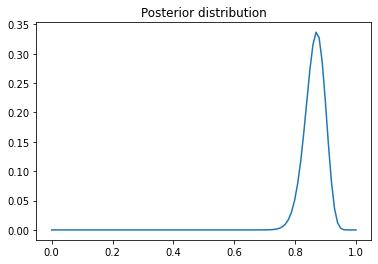

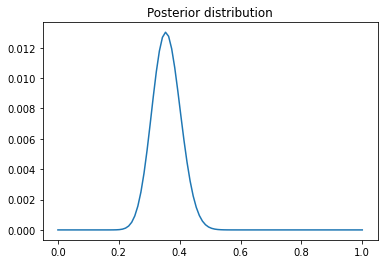

0.8686868686868687
0.3535353535353536


In [57]:
prior = beta(5, 1.5)
p_1 = 0.9
p_2 = 0.4

n = 100

MAP_9 = non_uniform_prior(p_1, n, prior)
MAP_4 = non_uniform_prior(p_2, n, prior)

print(MAP_9)
print(MAP_4)

# Problem 3

In [54]:
def weather_forecast(transition_matrix, days=10):
    """
    Given the above transition matrix and assuming the 0th day is sunny,
    sample from the markov chain to give a possible forecast of the 10 following
    days. 
    """
    labels = ['sun', 'rain', 'wind']
    current = 0
    seq = []
    for i in range(days):
      current = np.random.choice(3, p=transition_matrix[current, :])
      seq.append(labels[current])
    return seq

In [55]:
transition_matrix = np.array(
  [
    [0.6,0.1,0.3],
    [0.2,0.6,0.2],
    [0.3,0.4,0.3]
  ]
)

weather_forecast(transition_matrix)

['wind', 'sun', 'wind', 'sun', 'wind', 'sun', 'wind', 'rain', 'sun', 'wind']

# Problem 4

In [52]:
def posterior_sampling(data, n=1000):
    """
    Given data that flips a coin 100 times, assume the data are distributed 
    as Bernoulli(p) for some unknown value of p, where p has a prior of 
    Beta(1,1). Set up a PyMC3 model for this situation and sample from the 
    poterior n times. Print a trace plot. Return the mean for the posterior.
    
    Parameters:
        data (array): The coin flips
        n (int): number of samples to take from the posterior
        
    Returns:
        Mean (float): The average of the coin flips (estimated p)
    """
    model = pm.Model()
    with model:
      p = pm.Beta('p', alpha=1, beta=1)
      y = pm.Bernoulli('y', p=p, observed=data)
      trace = pm.sample(n) #n is the desired number of samples
      az.plot_trace(trace)
      p = trace['p']
      mean = p.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


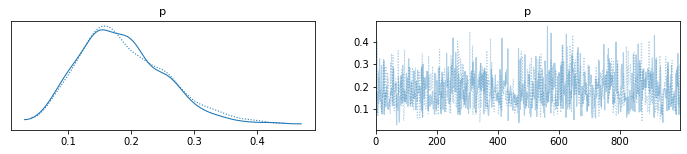

In [53]:
data = bernoulli.rvs(0.2, size=30)
posterior_sampling(data)

# Problem 5

In [50]:
def height_model(observed_heights,m=180,s=10,alpha=2,beta=10,n=1000):

    """
    Given a dataset of the measured heights of 100 men, assume the data are
    distributed as Normal(mu,1/tau) where mu has a prior of Normal(m,s), and tau has
    a prior of Gamma(alpha,beta). Set up a PyMC3 model for this situation and sample 
    from the poterior n times. Print a trace plot for mu and tau. Return the mean 
    for the posterior of mu.
    
    Parameters:
        observed_heights (array): The measured heights of 100 men
        m (int): the mean in the prior distribution of mu
        s (int): the standard deviation in the prior distribution of mu
        alpha (int): the first component in the prior distibution of tau
        beta (int): the second component in the prior distribution of tau
        n (int): number of samples from the posterior
        
    Returns:
        mu_mean (float): the estimated value of mu
    """
    model = pm.Model()
    with model:
      mu = pm.Normal('mu', m,s)
      tau = pm.Gamma('tau', alpha, beta)
      y = pm.Normal('y', mu, 1/tau, observed=observed_heights)

      trace = pm.sample(n) #n is the desired number of samples
      az.plot_trace(trace)
      mu = trace['mu']
      mean = mu.mean()
    return mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [tau, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.


180.05649536250164

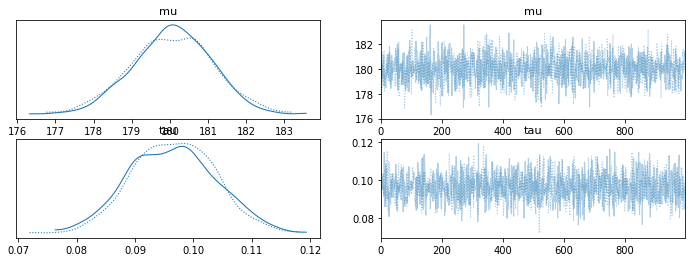

In [51]:
heights = np.random.normal(180,10,100)
height_model(heights)